In [3]:
#______________________________________________________import libraries_______________________________________________________________________#

import numpy as np # linear algebra
import pandas as pd # data processing
from scipy import optimize as op # Advanced optimization
import warnings 
warnings.filterwarnings('ignore') #ignore's warnings
from math import ceil 
import numpy as np
import math
import operator

#________________________________________________________Visualization_________________________________________________________________________#

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score # Accuracy score
from sklearn.tree import DecisionTreeClassifier, plot_tree #Decision tree
from sklearn.svm import SVC

#____________________________________________________Spliting training and testing_____________________________________________________________#

from sklearn.model_selection import train_test_split



In [4]:
# Loading the data

df_iris = pd.read_csv('E:\Data Science\Data_Analytics\iris.csv', header=0)
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df_iris['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [8]:
df_iris.isnull().values.any()


False

In [11]:
print('Iris-setosa')
setosa = df_iris['species'] == 'Iris-setosa'
print(df_iris[setosa].describe())
print('\nIris-versicolor')
versicolor = df_iris['species'] == 'Iris-versicolor'
print(df_iris[versicolor].describe())
print('\nIris-virginica')
virginica = df_iris['species'] == 'Iris-virginica'
print(df_iris[virginica].describe())

Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Iris-versicolor
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        

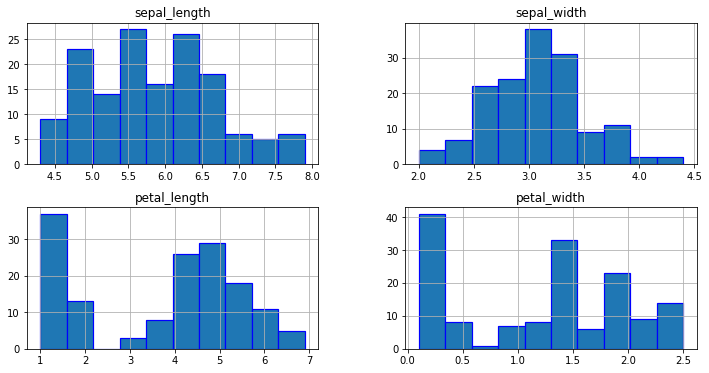

In [12]:
# The Histogram representation of the univariate plots for each measurement
np = df_iris
np.hist(edgecolor='blue', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


Text(0.5, 1.0, 'sepal Length VS width')

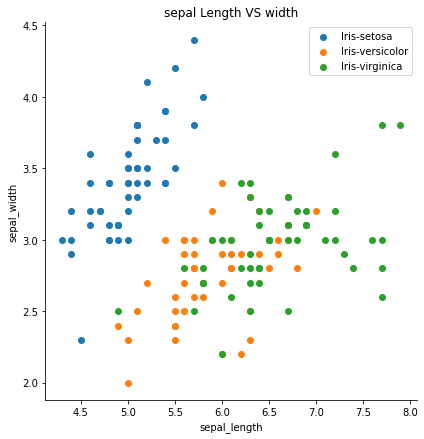

In [13]:
# Plotting scatter plot with respect to sepal length
sepalPlt = sb.FacetGrid(df_iris, hue="species", size=6).map(plt.scatter, "sepal_length", "sepal_width")
plt.legend(loc='upper right');
plt.title("sepal Length VS width")

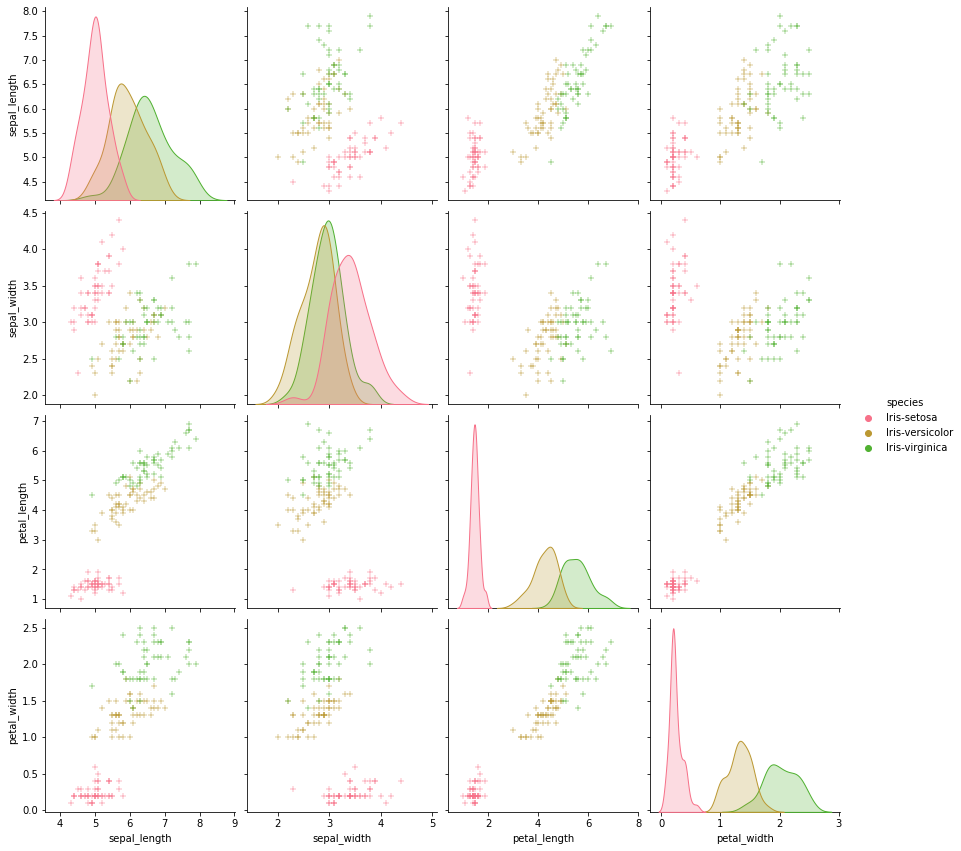

In [14]:
# Using seaborn pairplot to see the bivariate relation between each pair of features

import seaborn as sns
sns.set_palette('husl')

nl = df_iris
b = sns.pairplot(nl,hue="species", diag_kind="kde", markers='+',size =3);
plt.show()

In [22]:
# setting our data
import numpy as np
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# Number of examples
m = df_iris.shape[0]
# Features
n = 4
# Number of classes
k = 3

X = np.ones((m,n + 1))
y = np.array((m,1))
X[:,1] = df_iris['petal_length'].values
X[:,2] = df_iris['petal_width'].values
X[:,3] = df_iris['sepal_length'].values
X[:,4] = df_iris['sepal_width'].values

# Labels
y = df_iris['species'].values

# Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
# it shows 80% of data is split for training and 20% of the data goes to testing.

X = df_iris.drop(['species'], axis=1)
y = df_iris['species']
# print(X.head())
print(X_train.shape)
# print(y.head())
print(y_test.shape)

(120, 5)
(30,)


In [24]:
# Sigmoid function

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

#_____________________________________________________Regularized cost function______________________________________________________________#

def reglrCostFunction(theta, X, y, lambda_s = 0.1):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    reg = (lambda_s/(2 * m)) * np.sum(theta**2)
    J = J + reg
 
    return J
#_____________________________________________________Regularized gradient function_________________________________________________________#

def reglrGradient(theta, X, y, lambda_s = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = lambda_s * theta /m
    gd = ((1 / m) * X.T.dot(h - y)) 
    gd = gd + reg

    return gd
#_________________________________________________Optimizing logistic regression (theta)____________________________________________________#

def logisticRegression(X, y, theta):
    result = op.minimize(fun = reglrCostFunction, x0 = theta, args = (X, y), method = 'TNC', jac = reglrGradient)
    
    return result.x

In [25]:
# Training
all_theta = np.zeros((k, n + 1))

# One vs all
i = 0
for flower in species:
    tmp_y = np.array(y_train == flower, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [26]:
# Predictions
Prob = sigmoid(X_test.dot(all_theta.T)) # probability for each flower
pred = [species[np.argmax(Prob[i, :])] for i in range(X_test.shape[0])]

print(" Test Accuracy ", accuracy_score(y_test, pred) * 100 , '%')

 Test Accuracy  96.66666666666667 %


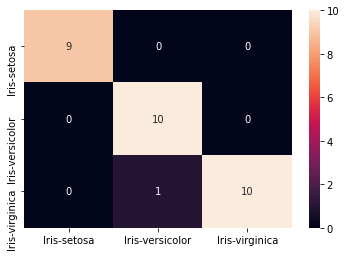

In [27]:
# Confusion Matrix
cnfm = confusion_matrix(y_test, pred, labels = species)

sb.heatmap(cnfm, annot = True, xticklabels = species, yticklabels = species);

In [28]:
# classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [29]:
#__________________________________________________KNN using Euclidian Distance_______________________________________________________________#

def euclidianDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
       
    return np.sqrt(distance)

In [30]:
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    for x in range(len(trainingSet)):
        
        dist = euclidianDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
      
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
   
 
    neighbors = []

   
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    classVotes = {}
    
  
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1


    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)

In [31]:
testSet = [[1.4, 3.6, 5.6, 1.2]]
test = pd.DataFrame(testSet)
result,neigh = knn(df_iris, test, 5)#here we gave k=4
print("And the flower is:",result)
print("the neighbors are:",neigh)

And the flower is: Iris-versicolor
the neighbors are: [106, 84, 59, 57, 90]


In [32]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [33]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]


In [34]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9333333333333333


In [35]:
#___________________________________________Cross validation using Brute Force_____________________________________________________________#
from sklearn.model_selection import cross_val_score
cv_scores = []
neighbors = list(np.arange(3,50,2))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')
    
    cross_val = cross_val_score(knn,X_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'brute')
knn_optimal.fit(X_train,y_train)
pred = knn_optimal.predict(X_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using brute is {1}".format(optimal_n,acc))

The accuracy for optimal k = 5 using brute is 96.66666666666667


In [36]:
print("classification_report using brute force")
print(classification_report(y_test,pred))

classification_report using brute force
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



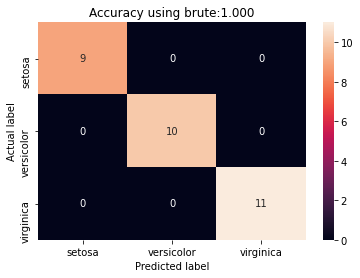

In [37]:

clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using brute:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
#_________________________________________________________________________________________________________________________________________#
#____________________________________________Applying different Classification Models using "sklearn"______________________________________#
#_________________________________________________________________________________________________________________________________________#


# Seperating the data into dependent and independent variables

X = df_iris.iloc[:, :-1].values
y = df_iris.iloc[:, -1].values

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [41]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [31]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


In [32]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [33]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [34]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9666666666666667


In [35]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [36]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [37]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


In [38]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [39]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [40]:
# Accuracy score

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


accuracy is 1.0


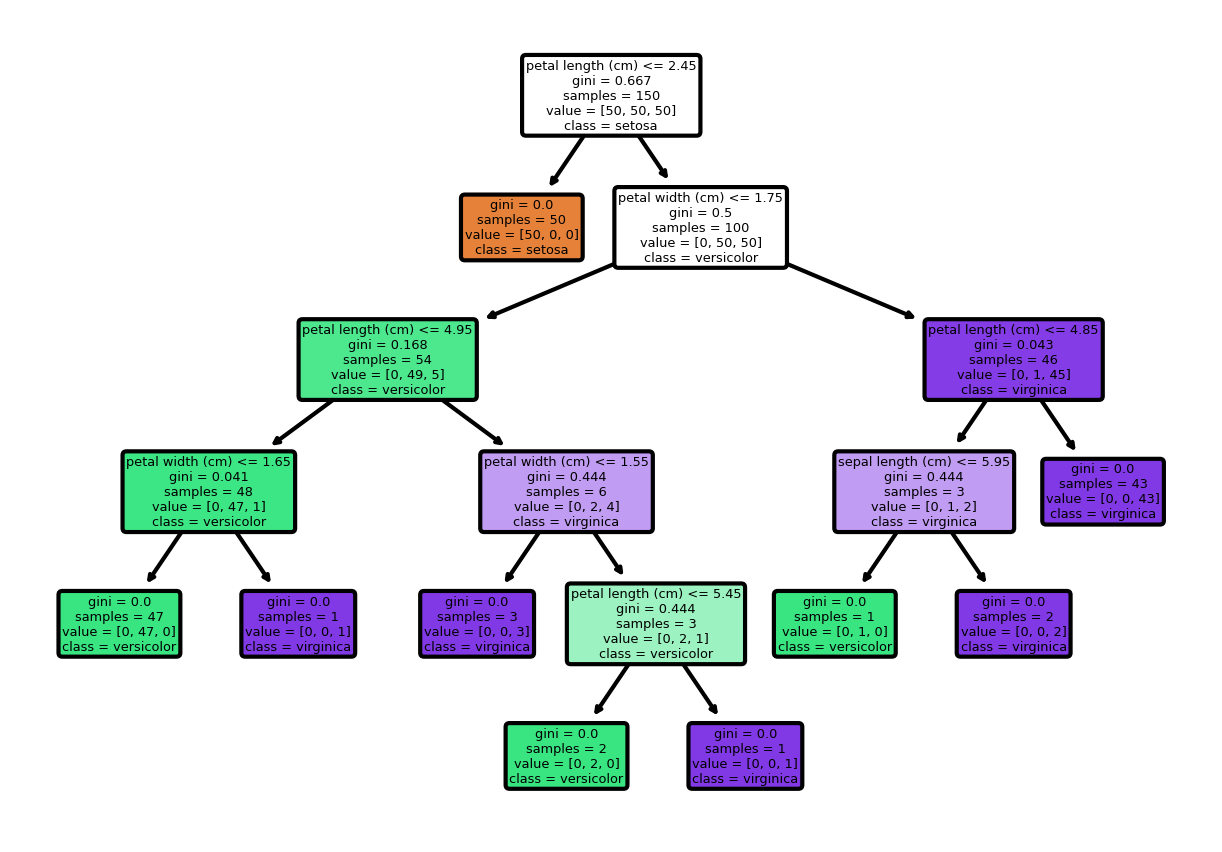

In [41]:
#Decision tree figure with analysis

from sklearn.datasets import load_iris
iris = load_iris()
plt.figure(figsize=(5, 3.5), dpi=300)
classifier = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(classifier, feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True)
plt.show()

